#### Using pygalfitm with S-PLUS

##### You should check out the example.ipynb first to understand the basics of pygalfitm.

This package was developed having s-plus in mind, so we created a simple function to fill the base parameters to the PyGalfitm class and sersic component params also.

First import Pygalfitm and connect to your splusdata account. (same as splus.cloud)

Also import from pygalfitm.VOs import splus module

In [18]:
%load_ext autoreload
%autoreload 2

from pygalfitm.VOs import splus

from pygalfitm import PyGalfitm
import splusdata

conn = splusdata.Core()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Set the data folder where all input and psf images will be stored and output folder where feedmes and results will be stored

In [19]:
import os

DATA_FOLDER = "dev/data"
OUTPUT_FOLDER = "dev/outputs"

if not os.path.exists(DATA_FOLDER):
    os.makedirs(DATA_FOLDER)
if not os.path.exists(OUTPUT_FOLDER):
    os.makedirs(OUTPUT_FOLDER)

#### Here we call **splus.get_splus_class** that is going to return a PyGalfitm object 

In [28]:
pygalgitm_object = splus.get_splus_class(
    name = "test", 
    ra = 51.30076502619, ## Add your RA here 
    dec = -32.9024762233, ## Add your DEC here
    cut_size = 200, ## Size of the cutout in pixels
    use_sigma=True, ## Use the sigma image to mask the image
    data_folder = DATA_FOLDER, 
    output_folder = OUTPUT_FOLDER, 
    remove_negatives = True,
    conn = conn, 
    bands=["J0378", "g", "J0515", "r", "J0660", "i", "z"]
)

##### Check the active components

In [4]:
pygalgitm_object.active_components

['sersic']

##### Check the base 

In [5]:
pygalgitm_object.print_base()

A) dev/data/test_j0378.fits,dev/data/test_g.fits,dev/data/test_j0515.fits,dev/data/test_r.fits,dev/data/test_j0660.fits,dev/data/test_i.fits,dev/data/test_z.fits # Input data image (FITS file)
A1) j0378,g,j0515,r,j0660,i,z        # Nick names (band labels) 
A2) 3773.13,4758.49,5133.15,6251.83,6613.88,7670.59,8936.64 # Effective wavelenghts
B) dev/outputs/testss.fits          # Output data image block
C) none                             # Sigma image name (made from data if blank or 'none')
D) dev/data/psf_test_j0378.fits,dev/data/psf_test_g.fits,dev/data/psf_test_j0515.fits,dev/data/psf_test_r.fits,dev/data/psf_test_j0660.fits,dev/data/psf_test_i.fits,dev/data/psf_test_z.fits # Input PSF image and (optional) diffusion kernel
E) 1                                # PSF fine sampling factor relative to data 
F) none                             # Bad pixel mask (FITS image or ASCII coord list)
G) none                             # File with parameter constraints (ASCII file) 
H) 1   200  1 

##### Check the component

In [6]:
pygalgitm_object.print_component("sersic")

1) 100.0,100.0,100.0,100.0,100.0,100.0,100.0 1     band       # Position x [pixel]
2) 100.0,100.0,100.0,100.0,100.0,100.0,100.0 1     band       # Position y [pixel]
3) 17.363922,16.053898,15.906772,15.510328,15.362182,15.269087,15.117862 3     band       # Integrated magnitude
4) 11.016244,12.861714,12.90412,13.6819515,14.776305,13.942284,14.201047 2     band       # R_e (effective radius) [pix]
5) 4,4,4,4,4,4,4                       2     band       # Sersic index n (de Vaucouleurs n=4)
9) 0.52833205,0.86291546,0.85205245,0.7813333,0.82325613,0.7817216,0.83502877 1     band       # Axis ratio (b/a)
10) -13.037016,79.98894,38.007793,84.7104,89.359314,84.90772,84.425285 1     band       # Position angle (PA) [deg: Up=0, Left=90]
Z) 0                                                    # Skip this model in output image? (yes=1, no=0)


#### Write the feedme and run

In [8]:
pygalgitm_object.write_feedme()
_ = pygalgitm_object.run()

#### Read output and plots

In [9]:
from pygalfitm.read import read_output_to_class

In [10]:
## This It reads the .band output and returns a PyGalfitm instance 
## with all parameters from the output.band loaded into the base and components.

out_pygal = read_output_to_class(os.path.join(OUTPUT_FOLDER, "testss.galfit.01.band"))

In [11]:
out_pygal.activate_components(["sersic", "sersic", "expdisk"])

Added component as sersic1


In [13]:
out_pygal.active_components

['sersic', 'sersic1', 'expdisk']

In [14]:
out_pygal.print_base()

A) dev/data/test_j0378.fits,dev/data/test_g.fits,dev/data/test_j0515.fits,dev/data/test_r.fits,dev/data/test_j0660.fits,dev/data/test_i.fits,dev/data/test_z.fits       # Input data image (FITS file)
A1) j0378,g,j0515,r,j0660,i,z        # Band labels
A2) 3773.13,4758.49,5133.15,6251.83,6613.88,7670.59,8936.64      # Band wavelengths
B) dev/outputs/testss.fits          # Output data image block
C) none,none,none,none,none,none,none 0.000    # Sigma image and min. sigma factor (made from data if blank or "none")
D) dev/data/psf_test_j0378.fits,dev/data/psf_test_g.fits,dev/data/psf_test_j0515.fits,dev/data/psf_test_r.fits,dev/data/psf_test_j0660.fits,dev/data/psf_test_i.fits,dev/data/psf_test_z.fits           # Input PSF image and (optional) diffusion kernel
E) 1                                # PSF fine sampling factor relative to data
F) none,none,none,none,none,none,none       # Bad pixel mask (FITS image or ASCII coord list)
G) none                             # File with parameter con

In [15]:
out_pygal.print_component("sersic")

1) 102.404,102.404,102.404,102.404,102.404,102.404,102.404 1,0,0,0,0,0,0 band       #      Position x
2) 99.932,99.932,99.932,99.932,99.932,99.932,99.932 1,0,0,0,0,0,0 band       #      Position y
3) 14.629,14.342,14.244,13.993,13.925,13.760,13.631 1,1,1,0,0,0,0 band       #  Integrated magnitude
4) 92.641,89.169,87.849,83.907,82.632,78.908,74.448 1,1,0,0,0,0,0 band       #  R_e (effective radius)   [pix]
5) 3.321,3.309,3.305,3.292,3.287,3.275,3.260 1,1,0,0,0,0,0 band       #  Sersic index n (de Vaucouleurs n=4)
6) 0,0,0,0,0,0,0                       0,0,0,0,0,0,0 band       #     -----
7) 0,0,0,0,0,0,0                       0,0,0,0,0,0,0 band       #     -----
8) 0,0,0,0,0,0,0                       0,0,0,0,0,0,0 band       #     -----
9) 0.665,1.000,0.989,0.918,0.960,0.919,0.972 1,0,0,0,0,0,0 band       #  Axis ratio (b/a)
10) -193.037,-100.011,-141.992,-95.290,-90.641,-95.092,-95.575 1,0,0,0,0,0,0 band       #  Position angle (PA) [deg: Up=0, Left=90]
Z) 0                            

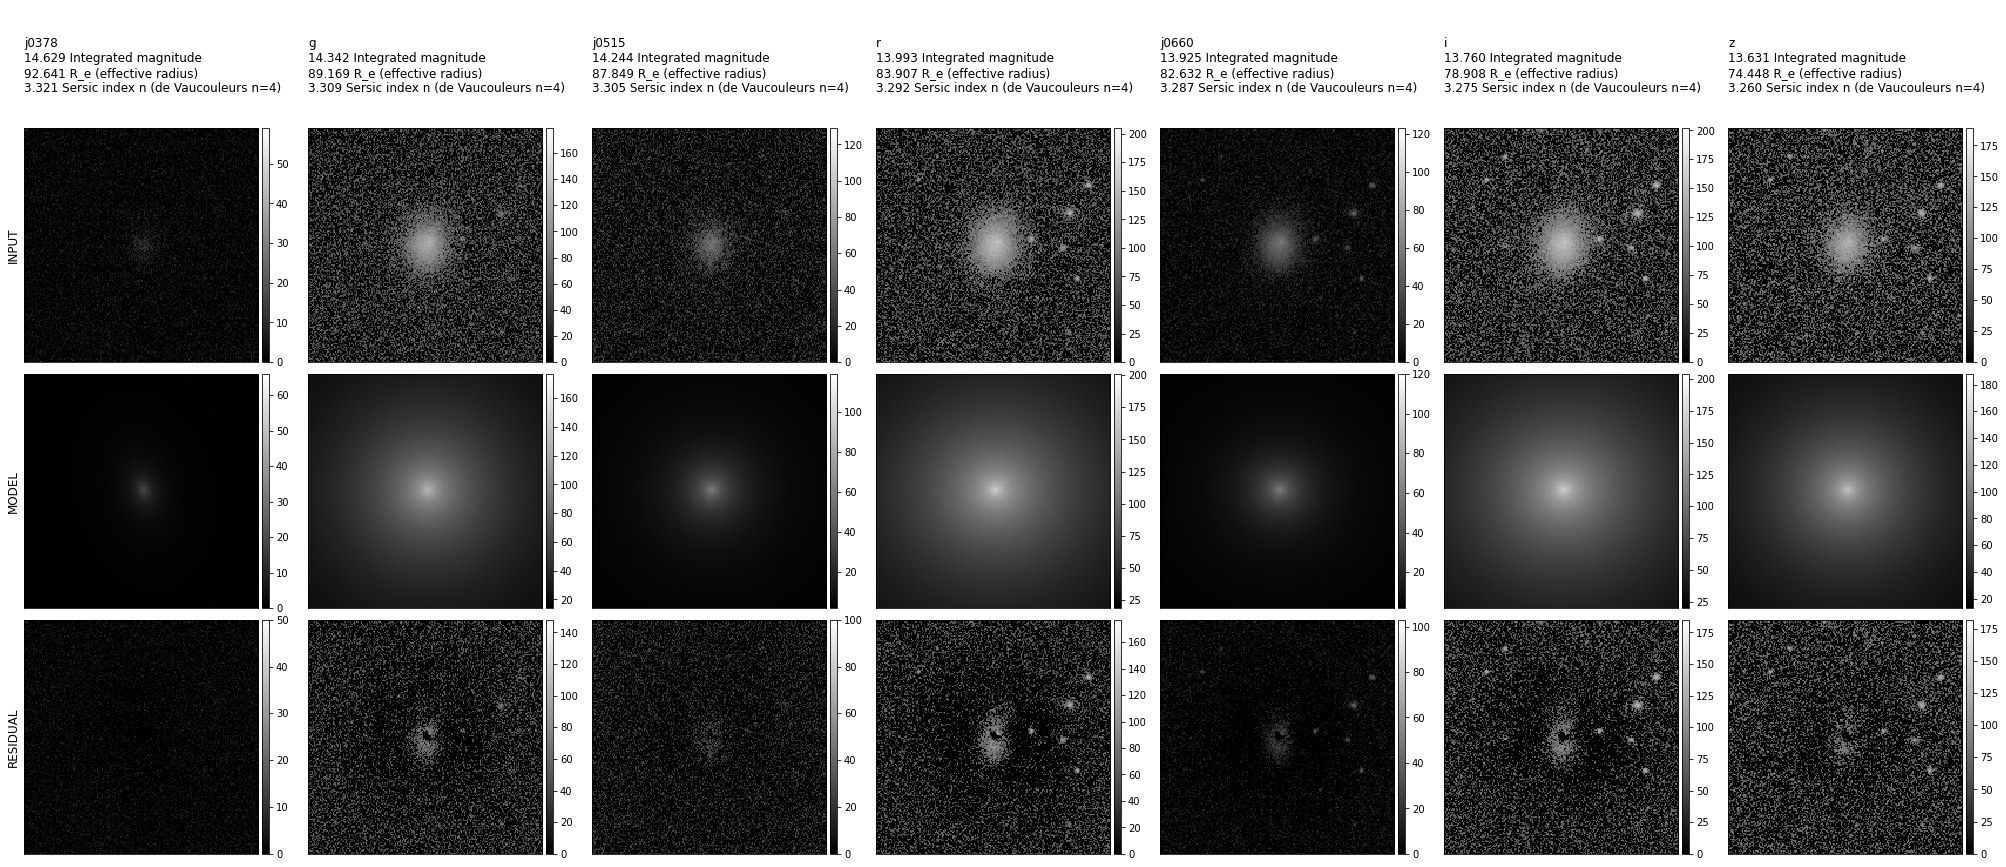

In [16]:
out_pygal.gen_plot(
    "sersic", 
    return_plot = False, 
    plot_parameters=[3, 4, 5], 
    colorbar=True
)

In [22]:
out_pygal.create_fits_table(os.path.join(OUTPUT_FOLDER, "test.out.fits"))

In [23]:
from astropy.io import fits
from astropy.table import Table

cube = fits.open(os.path.join(OUTPUT_FOLDER, "test.out.fits"))

In [24]:
cube

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x16b1aabe0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x16b1aa400>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x16b143670>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x16b1a2d60>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x16b1a2b50>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x16b1a2be0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x16b1a2c40>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x16b139610>]

In [30]:
print(cube[1].name)
Table(cube[1].data)

J0378


ID,sersic_Position_x,sersic_Position_y,sersic_Integrated_magnitude,sersic_R_e,sersic_Sersic_index_n,sersic_Axis_ratio,sersic_Position_angle,ZP
str4,float64,float64,float64,float64,float64,float64,float64,float64
test,103.405,100.928,15.619,94.527,4.321,1.665,-192.037,20.048
test,103.405,100.928,15.619,94.527,4.321,1.665,-192.037,20.048
